In [67]:
import xarray as xr
import cftime 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import os
import time
import logging
import cartopy.crs as ccrs
import metpy  
import calendar
import argparse
import glob
import geopandas
from geodatasets import get_path
import seaborn as sns

In [118]:

output_col_names = ['lon'
,'lat'
,'variable'
,'cohort_number'
,'stand_age'
,'potential_veg'
,'current_veg'
,'subtype'
,'community_type'
,'silt_clay'  ###check this order
,'lc_state'
,'land_area'
,'cohort_area'
,'year'
,'annual_sum'
,'monthly_maximum'
,'monthly_mean'
,'monthly_minimum'
,'Jan'
,'Feb'
,'Mar'
,'Apr'
,'May'
,'Jun'
,'Jul'
,'Aug'
,'Sep'
,'Oct'
,'Nov'
,'Dec'
,'region']

clm_names = ['lon', 'lat','var' ,'Area', 'year', 'sum', 'max', 'average'
         , 'min', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct'
         , 'Nov', 'Dec', 'Area_Name']

# restart_cols = ['lon','lat',]

colnames_lulc = ['lon', 'lat', 'variable', 'year', 'cohort number', 'cohort source number', 'stand age', 'cohort area ', 
'potential natural vegetaion', 'current vegetation', 'vegetation subtype', 'lc state', 'previous years lc state', 
'fert flag', 'irrg flag', 'till flag', 'disturbance type', 'disturbance month', 'fire return interval',
'th1', 'th2', 'th3', 'th4', 'th5', 'th6', 'country']


In [130]:
# num = 130 ###gets off track after s_e.loc[(s_e['lon']==-155.5)
       # & (s_e['lat']==64.5) 
       #    &(s_e['year']==1851)]
num = 0

##### pre data bcc sonya executable
pre_b = pd.read_csv("/group/moniergrp/TEM_Large_Ensemble/run_support_files/test_ensemble_executable/region_1/pre_data/test_folder/var_out/SOILORGC.csv"+str(num), names = output_col_names)
hist_b =  pd.read_csv("/group/moniergrp/TEM_Large_Ensemble/run_support_files/test_ensemble_executable/region_1/historical/test_folder/var_out/SOILORGC.csv"+str(num), names = output_col_names)
b_e = pd.concat([pre_b,hist_b])
##### pre data bcc ben executable
pre_s = pd.read_csv("/group/moniergrp/TEM_Large_Ensemble/run_support_files/large_ensemble/region_1/pre_data/BCCxxCSM2xxMR/var_out/SOILORGC.csv"+str(num), names = output_col_names)
# hist_s = pd.read_csv("/group/moniergrp/TEM_Large_Ensemble/run_support_files/large_ensemble/region_1/historical/BCCxxCSM2xxMR/var_out/SOILORGC.csv"+str(num), names = output_col_names)
hist_s = pd.read_csv("/group/moniergrp/TEM_Large_Ensemble/run_support_files/large_ensemble/region_1/historical/BCCxxCSM2xxMR/var_out_old/SOILORGC.csv"+str(num), names = output_col_names)
s_e = pd.concat([pre_s,hist_s])
# ##### pre data bcc ben executable

# old_hist_s = pd.read_csv("/group/moniergrp/TEM_Large_Ensemble/run_support_files/large_ensemble/region_1/historical/BCCxxCSM2xxMR/var_out_old/SOILORGC.csv"+str(num), names = output_col_names)
# old_s_e = pd.concat([pre_s,old_hist_s])
s_e['coords'] = s_e['lon'].astype(str)+s_e['lat'].astype(str)



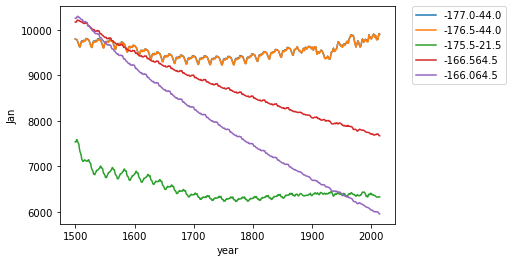

In [153]:
sns.lineplot(data = s_e.loc[(s_e['cohort_number'] == 1)
                           &(s_e['lon'] < -165.5)
                           ], x = 'year',y='Jan', hue = 'coords')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


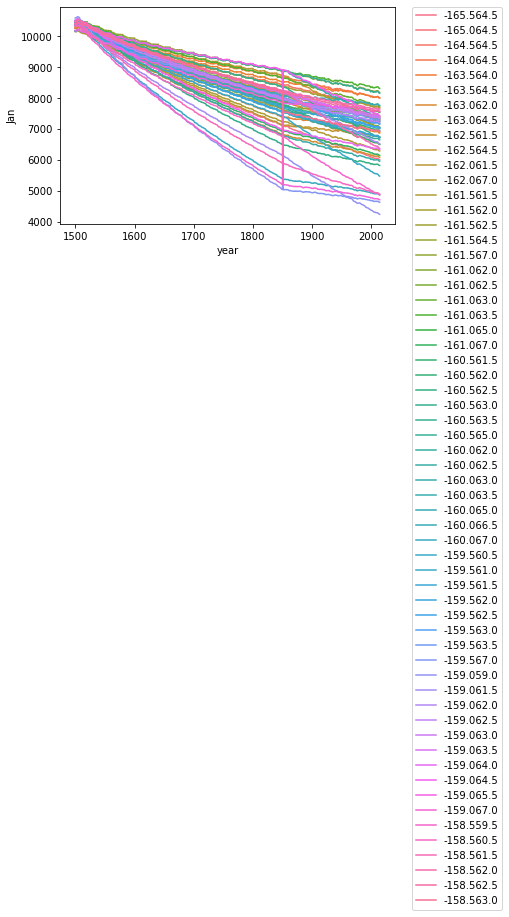

In [154]:
sns.lineplot(data = s_e.loc[(s_e['cohort_number'] == 1)
                           &(s_e['lon'] >= -165.5)
                           ], x = 'year',y='Jan', hue = 'coords')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


<Axes: xlabel='year', ylabel='Jan'>

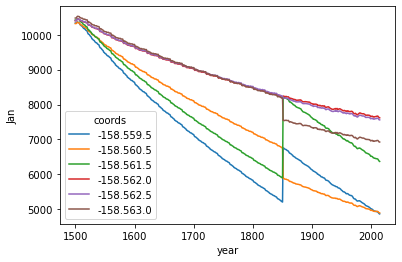

In [135]:
sns.lineplot(data = s_e.loc[(s_e['cohort_number'] == 1)
                           &(s_e['lon'] >= -158.5)
                           ], x = 'year',y='Jan', hue = 'coords')

In [162]:
tt = s_e.loc[ (s_e['year'].between(1850,1851))
        & s_e['coords'].isin(['-165.564.5','-165.064.5','-164.564.5' ]),
       ['lon','lat','year','cohort_number','Jan','Dec']]
tt=tt.sort_values(['lon','lat','cohort_number','year'])
tt

,lon,lat,year,cohort_number,Jan,Dec
56421,-165.5,64.5,1850,1,7108.50,7100.36
80713,-165.5,64.5,1851,1,7105.78,7105.27
56422,-165.5,64.5,1850,2,6623.87,6567.39
80714,-165.5,64.5,1851,2,6568.20,6525.11
56423,-165.5,64.5,1850,3,6675.90,6617.18
80715,-165.5,64.5,1851,3,6617.82,6572.29
56424,-165.5,64.5,1850,4,6728.20,6665.46
80716,-165.5,64.5,1851,4,6665.76,6615.50
56425,-165.5,64.5,1850,5,6786.59,6721.44
80717,-165.5,64.5,1851,5,6721.55,6669.08


In [151]:
tt = s_e.loc[
    # (s_e['cohort_number'] == 1)
             # (s_e['lon'] >= -160)
             #               &
    (s_e['year'].between(1850,1851))].groupby(['lon','lat','year'])['cohort_number'].max()


tt=tt.reset_index()
tt=tt.sort_values(['lon','lat','year'])
tt.loc[tt['cohort_number']>1]

,lon,lat,year,cohort_number
4,-175.5,-21.5,1850,339
5,-175.5,-21.5,1851,339
10,-165.5,64.5,1850,10
11,-165.5,64.5,1851,11


In [93]:
restart = pd.read_csv('/group/moniergrp/TEM_Large_Ensemble/run_support_files/large_ensemble/region_1/pre_data/BCCxxCSM2xxMR/restart/TEM_RESTART_1850130'
                      ,header = None, sep = ' ')
                      
                      
restart=restart[[0,1,2,3,4,22]]
restart.columns = ['lon'
,'lat'
,'cohort_number'
,'cohort_number1'
,'stand_age','soil_restart']    

In [119]:
lulcc = pd.read_csv('/group/moniergrp/TEM_Large_Ensemble/input_files/large_ensemble/region_1/lulcc/historical/lulcc_1851_2014.txt'

,names = colnames_lulc)

In [98]:
###are there any duplicates in restart?

print(len(restart))

print(len(restart[['lon'
,'lat'
,'cohort_number']].drop_duplicates()))

112
112


In [100]:
### restart files are the same as the 1850 dec value

cc = restart.merge(
    s_e.loc[(s_e['year'].between(1850, 1851))],
on = ['lon'
,'lat'
,'cohort_number', 'stand_age']
             )

cc.loc[(cc['year']==1850 ) & (cc['soil_restart'] != cc['Dec'])]

,lon,lat,cohort_number,cohort_number1,stand_age,soil_restart,variable,potential_veg,current_veg,subtype,...,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,region


In [125]:
restart.loc[(restart['lon']==-155.5)
       & (restart['lat']==64.5) ]

,lon,lat,cohort_number,cohort_number1,stand_age,soil_restart
15,-155.5,64.5,1,1,3000,8868.00
16,-155.5,64.5,2,2,775,8868.00
17,-155.5,64.5,3,1,328,8173.61
18,-155.5,64.5,4,1,301,8245.02
19,-155.5,64.5,5,1,266,8237.95
20,-155.5,64.5,6,1,212,8223.61
21,-155.5,64.5,7,1,158,8177.98
22,-155.5,64.5,8,1,103,8058.11
23,-155.5,64.5,9,1,68,7921.53
24,-155.5,64.5,10,1,46,7778.97


In [126]:
s_e.loc[(s_e['lon']==-155.5)
       & (s_e['lat']==64.5) 
          &(s_e['year']==1851)]

,lon,lat,variable,cohort_number,stand_age,potential_veg,current_veg,subtype,community_type,silt_clay,...,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,region
12965,-155.5,64.5,SOILORGC,1,3000,4,4,4,4,65.72,...,8897.21,8893.18,8882.50,8863.82,8855.88,8855.29,8855.78,8864.40,8873.06,United_States_of_America
12966,-155.5,64.5,SOILORGC,2,776,4,4,4,4,65.72,...,8897.21,8893.18,8882.50,8863.82,8855.88,8855.29,8855.78,8864.40,8873.06,United_States_of_America
12967,-155.5,64.5,SOILORGC,3,329,4,4,4,4,65.72,...,8201.44,8197.64,8187.53,8169.85,8162.37,8161.87,8162.39,8170.62,8178.88,United_States_of_America
12968,-155.5,64.5,SOILORGC,4,302,4,4,4,4,65.72,...,8273.10,8269.26,8259.07,8241.26,8233.73,8233.23,8233.76,8242.06,8250.40,United_States_of_America
12969,-155.5,64.5,SOILORGC,5,267,4,4,4,4,65.72,...,8265.98,8262.16,8252.01,8234.26,8226.76,8226.28,8226.82,8235.11,8243.44,United_States_of_America
12970,-155.5,64.5,SOILORGC,6,213,4,4,4,4,65.72,...,8251.54,8247.74,8237.66,8220.02,8212.57,8212.10,8212.67,8220.93,8229.23,United_States_of_America
12971,-155.5,64.5,SOILORGC,7,159,4,4,4,4,65.72,...,8205.76,8202.01,8192.04,8174.59,8167.23,8166.79,8167.37,8175.57,8183.80,United_States_of_America
12972,-155.5,64.5,SOILORGC,8,104,4,4,4,4,65.72,...,8085.96,8082.41,8072.74,8055.76,8048.68,8048.37,8049.07,8057.24,8065.43,United_States_of_America
12973,-155.5,64.5,SOILORGC,9,69,4,4,4,4,65.72,...,7949.59,7946.29,7937.02,7920.62,7913.91,7913.82,7914.73,7922.94,7931.18,United_States_of_America
12974,-155.5,64.5,SOILORGC,10,47,4,4,4,4,65.72,...,7807.76,7804.83,7796.03,7780.28,7774.02,7774.25,7775.47,7783.83,7792.23,United_States_of_America


In [122]:
lulcc.loc[(lulcc['lon']==-155.5)
       & (lulcc['lat']==64.5) 
          &(lulcc['year']==1851)]

,lon,lat,variable,year,cohort number,cohort source number,stand age,cohort area,potential natural vegetaion,current vegetation,...,disturbance type,disturbance month,fire return interval,th1,th2,th3,th4,th5,th6,country
152068,-155.5,64.5,LULCCHRT,1851,1,1,3000,1207,4,4,...,0,0,2000,0.00,0.0,0.0,0.0,0.00,0.0,United_States_of_America
152069,-155.5,64.5,LULCCHRT,1851,2,2,776,51,4,4,...,0,0,2000,0.00,0.0,0.0,0.0,0.00,0.0,United_States_of_America
152070,-155.5,64.5,LULCCHRT,1851,3,1,329,1,4,4,...,0,0,2000,0.33,0.6,0.3,0.1,0.01,0.0,United_States_of_America
152071,-155.5,64.5,LULCCHRT,1851,4,1,302,1,4,4,...,0,0,2000,0.33,0.6,0.3,0.1,0.01,0.0,United_States_of_America
152072,-155.5,64.5,LULCCHRT,1851,5,1,267,1,4,4,...,0,0,2000,0.33,0.6,0.3,0.1,0.01,0.0,United_States_of_America
152073,-155.5,64.5,LULCCHRT,1851,6,1,213,1,4,4,...,0,0,2000,0.33,0.6,0.3,0.1,0.01,0.0,United_States_of_America
152074,-155.5,64.5,LULCCHRT,1851,7,1,159,1,4,4,...,0,0,2000,0.33,0.6,0.3,0.1,0.01,0.0,United_States_of_America
152075,-155.5,64.5,LULCCHRT,1851,8,1,104,1,4,4,...,0,0,2000,0.33,0.6,0.3,0.1,0.01,0.0,United_States_of_America
152076,-155.5,64.5,LULCCHRT,1851,9,1,69,1,4,4,...,0,0,2000,0.33,0.6,0.3,0.1,0.01,0.0,United_States_of_America
152077,-155.5,64.5,LULCCHRT,1851,10,1,47,1,4,4,...,0,0,2000,0.33,0.6,0.3,0.1,0.01,0.0,United_States_of_America


In [116]:
###is the issue with the restart file when there is a new cohort in 1851?

cc.loc[(cc['lon']==-155.5)
       & (cc['lat']==64.5)
       
       ,['lon','lat','year','cohort_number','Jan','Dec','soil_restart'] ]

,lon,lat,year,cohort_number,Jan,Dec,soil_restart
30,-155.5,64.5,1850,1,8874.06,8868.00,8868.00
31,-155.5,64.5,1851,1,8876.57,8873.06,8868.00
32,-155.5,64.5,1850,2,8874.06,8868.00,8868.00
33,-155.5,64.5,1850,3,8178.48,8173.61,8173.61
34,-155.5,64.5,1850,4,8249.86,8245.02,8245.02
35,-155.5,64.5,1850,5,8242.64,8237.95,8237.95
36,-155.5,64.5,1850,6,8227.99,8223.61,8223.61
37,-155.5,64.5,1850,7,8181.67,8177.98,8177.98
38,-155.5,64.5,1850,8,8059.75,8058.11,8058.11
39,-155.5,64.5,1850,9,7920.69,7921.53,7921.53


In [111]:
cc[['lon','lat']].drop_duplicates().to_csv()

',lon,lat\n0,-156.0,64.5\n2,-156.0,65.0\n4,-156.0,65.5\n6,-156.0,66.0\n8,-156.0,66.5\n10,-155.5,59.5\n12,-155.5,60.0\n14,-155.5,60.5\n16,-155.5,61.0\n18,-155.5,61.5\n20,-155.5,62.0\n22,-155.5,62.5\n24,-155.5,63.0\n26,-155.5,63.5\n28,-155.5,64.0\n30,-155.5,64.5\n79,-155.5,65.0\n81,-155.5,65.5\n83,-155.5,66.0\n85,-155.5,66.5\n87,-155.0,57.0\n89,-155.0,59.5\n91,-155.0,60.0\n93,-155.0,60.5\n95,-155.0,61.0\n97,-155.0,61.5\n99,-155.0,62.0\n101,-155.0,62.5\n103,-155.0,63.0\n105,-155.0,63.5\n107,-155.0,64.0\n109,-155.0,64.5\n111,-155.0,65.0\n113,-155.0,65.5\n115,-155.0,66.0\n117,-155.0,66.5\n119,-154.5,57.0\n121,-154.5,57.5\n123,-154.5,59.0\n125,-154.5,60.5\n127,-154.5,61.0\n129,-154.5,62.5\n131,-154.5,63.0\n133,-154.5,63.5\n135,-154.5,64.0\n137,-154.5,64.5\n139,-154.5,65.5\n141,-154.5,66.0\n143,-154.5,66.5\n145,-154.0,57.5\n147,-154.0,59.0\n149,-154.0,62.5\n151,-154.0,63.0\n153,-154.0,64.0\n155,-154.0,64.5\n157,-154.0,65.0\n159,-154.0,65.5\n161,-154.0,66.0\n163,-154.0,66.5\n165,-153.5,57.5\n1

In [115]:
cc.loc[(np.abs(cc['soil_restart'] - cc['Jan']) > 200),['lon','lat','year','cohort_number','Jan','Dec','soil_restart'] ]

,lon,lat,year,cohort_number,Jan,Dec,soil_restart
80,-155.5,65.0,1851,1,8637.98,8636.07,8947.66
82,-155.5,65.5,1851,1,8230.96,8217.65,8629.84
86,-155.5,66.5,1851,1,5346.96,5360.60,8059.73
88,-155.0,57.0,1851,1,7264.64,7239.60,5341.38
90,-155.0,59.5,1851,1,5762.65,5755.61,7263.16
92,-155.0,60.0,1851,1,6150.07,6137.78,5758.95
94,-155.0,60.5,1851,1,7378.46,7372.07,6146.51
96,-155.0,61.0,1851,1,7767.85,7762.24,7373.23
100,-155.0,62.0,1851,1,6906.14,6900.13,7566.40
104,-155.0,63.0,1851,1,7970.08,7964.01,6937.44


In [15]:
s_e

,lon,lat,variable,cohort_number,stand_age,potential_veg,current_veg,subtype,community_type,silt_clay,...,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,region
0,-177.0,-44.0,GPP,1,3000,33,33,33,12,71.21,...,180.42,122.84,94.85,113.04,145.77,176.16,232.21,279.47,341.16,New_Zealand
1,-177.0,-44.0,GPP,1,3000,33,33,33,12,71.21,...,177.97,141.02,101.52,104.11,132.37,177.75,237.15,273.99,332.43,New_Zealand
2,-177.0,-44.0,GPP,1,3000,33,33,33,12,71.21,...,173.45,131.05,88.01,104.77,139.24,178.56,244.05,305.51,347.10,New_Zealand
3,-177.0,-44.0,GPP,1,3000,33,33,33,12,71.21,...,170.15,127.07,101.52,113.04,123.14,180.87,227.13,282.86,341.22,New_Zealand
4,-177.0,-44.0,GPP,1,3000,33,33,33,12,71.21,...,182.11,136.01,107.54,114.02,141.06,188.71,240.51,290.15,341.27,New_Zealand
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123022,-158.5,63.0,GPP,1,3000,5,5,5,4,59.02,...,13.73,27.66,23.11,22.59,9.95,3.04,0.00,0.10,0.00,United_States_of_America
123023,-158.5,63.0,GPP,1,3000,5,5,5,4,59.02,...,19.78,37.47,36.75,27.36,23.04,10.26,0.00,0.00,0.00,United_States_of_America
123024,-158.5,63.0,GPP,1,3000,5,5,5,4,59.02,...,22.83,40.97,48.65,39.02,28.26,3.43,0.00,0.52,0.00,United_States_of_America
123025,-158.5,63.0,GPP,1,3000,5,5,5,4,59.02,...,22.41,27.73,46.50,39.34,33.45,7.30,0.00,0.00,0.00,United_States_of_America


In [16]:
b_e

,lon,lat,variable,cohort_number,stand_age,potential_veg,current_veg,subtype,community_type,silt_clay,...,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,region
0,-177.0,-44.0,GPP,1,3000,33,33,33,12,71.21,...,180.92,123.38,95.42,113.31,145.21,174.85,232.76,285.46,349.83,New_Zealand
1,-177.0,-44.0,GPP,1,3000,33,33,33,12,71.21,...,179.64,142.46,102.43,104.66,132.48,177.31,237.41,275.52,336.25,New_Zealand
2,-177.0,-44.0,GPP,1,3000,33,33,33,12,71.21,...,174.35,131.86,88.40,104.85,138.76,177.70,244.07,307.72,350.58,New_Zealand
3,-177.0,-44.0,GPP,1,3000,33,33,33,12,71.21,...,170.87,127.45,101.51,112.60,122.28,179.88,226.58,283.99,343.72,New_Zealand
4,-177.0,-44.0,GPP,1,3000,33,33,33,12,71.21,...,181.26,135.35,106.85,112.94,139.27,186.68,238.75,289.60,342.21,New_Zealand
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123022,-158.5,63.0,GPP,1,3000,5,5,5,4,59.02,...,13.69,27.57,23.04,22.52,9.92,3.03,0.00,0.10,0.00,United_States_of_America
123023,-158.5,63.0,GPP,1,3000,5,5,5,4,59.02,...,19.71,37.33,36.61,27.26,23.00,10.24,0.00,0.00,0.00,United_States_of_America
123024,-158.5,63.0,GPP,1,3000,5,5,5,4,59.02,...,22.73,40.78,48.42,38.83,28.12,3.42,0.00,0.52,0.00,United_States_of_America
123025,-158.5,63.0,GPP,1,3000,5,5,5,4,59.02,...,22.29,27.58,46.23,39.11,33.37,7.12,0.00,0.00,0.00,United_States_of_America


In [54]:
test = pd.merge(s_e, b_e, on = ['lon'
,'lat'
,'variable'
,'cohort_number'
,'stand_age'
,'potential_veg'
,'current_veg'
,'subtype'
,'community_type'
,'silt_clay'  ###check this order
,'lc_state'
,'land_area'
,'cohort_area'
,'year'
,'region'])

In [27]:
s_e[['annual_sum']]

,annual_sum
0,292.8
1,272.5
2,186.7
3,213.2
4,220.2
...,...
17226,11.6
17227,11.5
17228,11.4
17229,11.2


In [55]:
test[['annual_sum_x','annual_sum_y']]
test


,lon,lat,variable,cohort_number,stand_age,potential_veg,current_veg,subtype,community_type,silt_clay,...,Mar_y,Apr_y,May_y,Jun_y,Jul_y,Aug_y,Sep_y,Oct_y,Nov_y,Dec_y
0,-156.0,64.5,SOILORGC,1,3000,4,4,4,4,65.70,...,10103.24,10104.05,10102.20,10081.49,10059.29,10039.89,10035.47,10040.61,10050.49,10060.72
1,-156.0,64.5,SOILORGC,1,3000,4,4,4,4,65.70,...,10087.53,10089.98,10088.66,10075.36,10051.62,10031.90,10025.27,10031.95,10041.34,10050.37
2,-156.0,64.5,SOILORGC,1,3000,4,4,4,4,65.70,...,10077.22,10082.38,10080.74,10074.58,10057.06,10049.56,10048.11,10056.35,10065.54,10075.26
3,-156.0,64.5,SOILORGC,1,3000,4,4,4,4,65.70,...,10100.78,10105.77,10103.74,10078.69,10062.82,10054.72,10053.33,10061.45,10071.06,10079.63
4,-156.0,64.5,SOILORGC,1,3000,4,4,4,4,65.70,...,10101.82,10104.68,10099.56,10090.32,10071.33,10056.24,10055.16,10056.29,10063.06,10072.53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63655,-153.5,64.0,SOILORGC,1,3000,4,4,4,4,59.66,...,1887.83,1887.65,1886.69,1885.06,1883.98,1884.08,1885.31,1886.85,1888.54,1890.24
63656,-153.5,64.0,SOILORGC,1,3000,4,4,4,4,59.66,...,1893.90,1893.73,1891.93,1889.75,1888.90,1888.67,1889.86,1891.19,1892.74,1894.21
63657,-153.5,64.0,SOILORGC,1,3000,4,4,4,4,59.66,...,1897.55,1896.59,1895.07,1892.31,1890.31,1890.21,1891.23,1892.83,1894.46,1896.06
63658,-153.5,64.0,SOILORGC,1,3000,4,4,4,4,59.66,...,1899.86,1899.70,1898.74,1897.18,1896.15,1896.33,1897.11,1898.68,1900.20,1901.65


In [59]:
test['coords'] = test['lon'].astype(str)+test['lat'].astype(str)

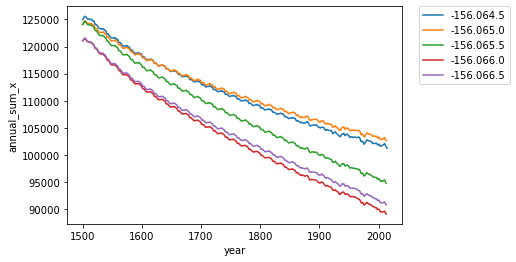

In [73]:
sns.lineplot(data = test.loc[
    (test['lon']<-155.5)
        &
    # (test['lat']==64.5)
    #     &
    (test['cohort_number']==1)
                    ]
             , x = 'year', y = 'annual_sum_x', hue = 'coords')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)



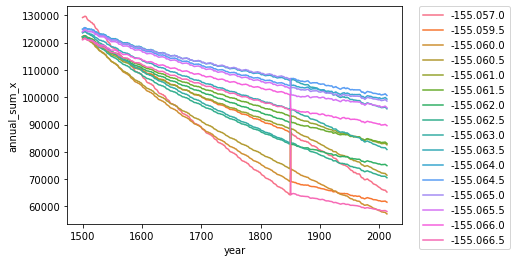

In [74]:
sns.lineplot(data = test.loc[
    (test['lon']==-155.0)
        &
    # (test['lat']==64.5)
    #     &
    (test['cohort_number']==1)
                    ]
             , x = 'year', y = 'annual_sum_x', hue = 'coords')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


In [62]:
plot_data = test.loc[
    (test['lon']>=-154)
        &
    # (test['lat']==64.5)
    #     &
    (test['cohort_number']==1)
                    ]

# plot_data = test.loc[(test['lon']==-156.5)
#         &(test['lat']==63)
#         &(test['cohort_number']==1)]

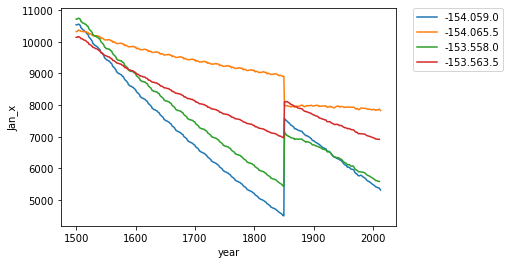

In [82]:
probs=['-153.558.0','-154.059.0','-154.065.5', '-153.563.5']

sns.lineplot(data = plot_data.loc[plot_data['coords'].isin(probs)], x = 'year', y = 'Jan_x', hue = 'coords')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)



In [68]:
test.loc[(test['year'].between(1849, 1852))
         &(test['coords'] == '-153.563.5')
         ,['year','Dec_x','Jan_x'] ]

,year,Dec_x,Jan_x
24559,1849,6966.67,6974.46
24560,1850,6962.91,6970.35
63424,1851,8099.69,8099.29
63425,1852,8097.15,8106.58


In [69]:
test.loc[(test['year'].between(1849, 1852))
         &(test['coords'] == '-153.564.0')
         ,['year','Dec_x','Jan_x'] ]

,year,Dec_x,Jan_x
24893,1849,8093.74,8099.21
24894,1850,8092.14,8099.42
63542,1851,6829.10,6839.17
63543,1852,6820.10,6834.67


In [81]:
check = test.loc[(test['year'].between(1850, 1851))
         &(test['lon'] == -155.5)
         ,['lon','lat','year','Dec_x','Jan_x'] ]

check.sort_values(['lon','lat'])

,lon,lat,year,Dec_x,Jan_x
2105,-155.5,59.5,1850,7269.42,7276.56
27661,-155.5,59.5,1851,7269.82,7274.60
2456,-155.5,60.0,1850,7263.38,7270.56
29695,-155.5,60.0,1851,7263.71,7268.55
2807,-155.5,60.5,1850,7374.35,7380.03
...,...,...,...,...,...
53329,-155.5,65.5,1851,8217.65,8230.96
9222,-155.5,66.0,1850,8224.51,8229.08
53463,-155.5,66.0,1851,8063.50,8066.02
9568,-155.5,66.5,1850,8059.73,8064.66


In [77]:
check = test.loc[(test['year'].between(1849, 1852))
         &(test['lon'] == -153.5)
         ,['lon','lat','year','Dec_x','Jan_x'] ]

check.sort_values(['lon','lat'])

,lon,lat,year,Dec_x,Jan_x
23223,-153.5,57.5,1849,4981.77,4994.72
23224,-153.5,57.5,1850,4969.11,4982.13
61778,-153.5,57.5,1851,5413.33,5418.68
61779,-153.5,57.5,1852,5412.61,5418.79
23557,-153.5,58.0,1849,5428.03,5440.39
23558,-153.5,58.0,1850,5416.07,5428.58
63070,-153.5,58.0,1851,7108.47,7142.78
63071,-153.5,58.0,1852,7084.72,7113.24
23891,-153.5,62.5,1849,7145.85,7153.57
23892,-153.5,62.5,1850,7142.22,7148.79


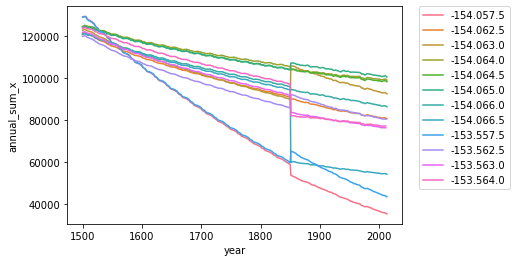

In [66]:
sns.lineplot(data = plot_data.loc[~plot_data['coords'].isin(probs)], x = 'year', y = 'annual_sum_x', hue = 'coords')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


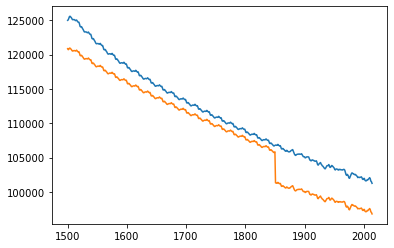

In [58]:
plt.plot(plot_data['year'], plot_data['annual_sum_x'], label = 'sonya')
plt.plot(plot_data['year'], plot_data['annual_sum_y'], label = 'ben')


In [35]:
plot_data.loc[plot_data['year'].between(1849, 1852),['year','Dec_x','Jan_x'] ]

,year,Dec_x,Jan_x
349,1849,8328.03,8338.12
350,1850,8327.50,8334.95
22815,1851,7924.88,7928.53
22816,1852,7913.06,7932.23


In [48]:
test2 = pd.merge(s_e, old_s_e, on = ['lon'
,'lat'
,'variable'
,'cohort_number'
,'stand_age'
,'potential_veg'
,'current_veg'
,'subtype'
,'community_type'
,'silt_clay'  ###check this order
,'lc_state'
,'land_area'
,'cohort_area'
,'year'
,'region'])

In [45]:
test2

,lon,lat,variable,cohort_number,stand_age,potential_veg,current_veg,subtype,community_type,silt_clay,...,Mar_y,Apr_y,May_y,Jun_y,Jul_y,Aug_y,Sep_y,Oct_y,Nov_y,Dec_y
0,-158.5,63.5,SOILORGC,1,3000,4,4,4,4,60.54,...,8349.14,8353.64,8350.43,8340.96,8325.51,8317.77,8316.02,8315.93,8323.76,8331.55
1,-158.5,63.5,SOILORGC,1,3000,4,4,4,4,60.54,...,8351.59,8354.34,8351.03,8344.74,8332.27,8312.42,8304.11,8306.27,8313.51,8319.19
2,-158.5,63.5,SOILORGC,1,3000,4,4,4,4,60.54,...,8336.13,8340.18,8339.48,8333.03,8314.41,8304.58,8303.62,8305.82,8313.05,8319.65
3,-158.5,63.5,SOILORGC,1,3000,4,4,4,4,60.54,...,8336.65,8338.95,8334.76,8322.70,8312.12,8303.03,8300.74,8306.09,8311.91,8319.45
4,-158.5,63.5,SOILORGC,1,3000,4,4,4,4,60.54,...,8339.34,8344.75,8345.00,8339.60,8322.98,8312.96,8307.78,8310.21,8317.24,8324.52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15443,-156.0,64.0,SOILORGC,80,8,4,4,4,4,64.43,...,7763.61,7750.23,7729.35,7703.92,7687.87,7674.96,7669.69,7666.80,7667.59,7668.06
15444,-156.0,64.0,SOILORGC,81,6,4,4,4,4,64.43,...,7936.65,7922.54,7900.63,7873.91,7856.52,7842.22,7835.75,7831.76,7831.61,7831.17
15445,-156.0,64.0,SOILORGC,82,4,4,4,4,4,64.43,...,8108.63,8094.09,8071.53,8044.03,8026.00,8011.10,8004.22,7999.87,7999.47,7998.78
15446,-156.0,64.0,SOILORGC,83,2,4,4,4,4,64.43,...,8272.46,8257.55,8234.46,8206.30,8187.79,8172.45,8165.31,8160.74,8160.22,8159.41


In [51]:
plot_data = test2.loc[(test2['lon']==-158.5)
        &(test2['lat']==63.5)
        &(test2['cohort_number']==1)
                    ]


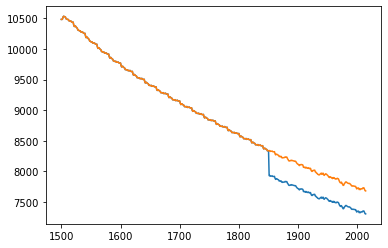

In [52]:
plt.plot(plot_data['year'], plot_data['Jan_x'], label = 'sonya')
plt.plot(plot_data['year'], plot_data['Jan_y'], label = 'ben')


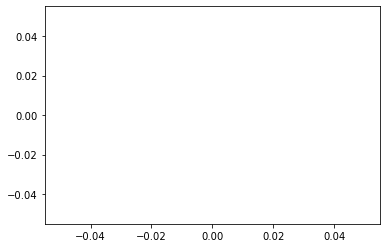

In [49]:
# plt.plot(plot_data['year'], plot_data['annual_sum_x'], label = 'sonya')
s_e_plt = s_e.loc[(s_e['lon']==-156)
        &(s_e['lat']==64)
        &(s_e['cohort_number']==1)]

plt.plot(s_e_plt['year'], s_e_plt['annual_sum'], label = 'ben')

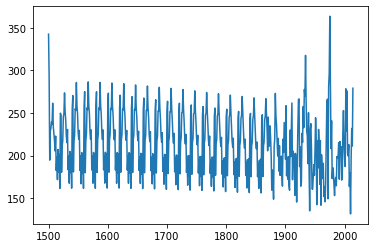

In [44]:
# plt.plot(plot_data['year'], plot_data['annual_sum_x'], label = 'sonya')
b_e_plt = b_e.loc[(b_e['lon']==-156)
        &(b_e['lat']==64)
        &(b_e['cohort_number']==1)]

plt.plot(b_e_plt['year'], b_e_plt['annual_sum'], label = 'ben')

In [ ]:
plt.plot(plot_data['year'], plot_data['annual_sum_y'])

<Axes: xlabel='year'>

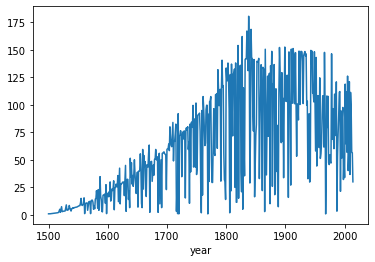

In [18]:
test.groupby('year')['cohort_number'].mean().plot()